In [78]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import pandas as pd
#import viz # curriculum viz example code

np.random.seed(123)

In [ ]:
# 1. A bank found that the average number of cars waiting during the noon hour at a drive-up window follows a 
#    Poisson distribution with a mean of 2 cars. Make a chart of this distribution and answer these 
#    questions concerning the probability of cars waiting at the drive-up window.

# What is the probability that no cars drive up in the noon hour?
# What is the probability that 3 or more cars come through the drive through?
# How likely is it that the drive through gets at least 1 car?


Text(0, 0.5, 'Probabiliy seeing x Cars')

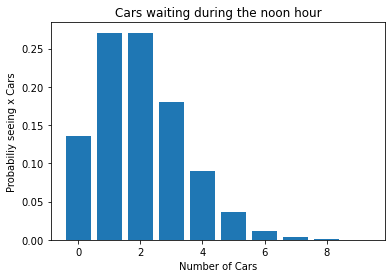

In [97]:
cars = 2       # mean
x = range(0,10)
y = stats.poisson(cars).pmf(x)

plt.bar(x,y)
plt.title('Cars waiting during the noon hour')
plt.xlabel('Number of Cars')
plt.ylabel('Probabiliy seeing x Cars')


In [93]:
# What is the probability that no cars drive up in the noon hour?

stats.poisson(cars).pmf(0).round(4)

0.1353

In [94]:
# What is the probability that 3 or more cars come through the drive through?

stats.poisson(cars).sf(2).round(4)

0.3233

In [95]:
# How likely is it that the drive through gets at least 1 car?

stats.poisson(cars).sf(0).round(4)

0.8647

In [189]:
# 2. Grades of State University graduates are normally distributed with a mean of 3.0  
#    and a standard deviation of .3. Calculate the following:

# What grade point average is required to be in the top 5% of the graduating class?

# What GPA constitutes the bottom 15% of the class?

# An eccentric alumnus left scholarship money for students in the third decile from the bottom of their class. 
# Determine the range of the third decile. Would a student with a 2.8 grade point average qualify for this scholarship?

# If I have a GPA of 3.5, what percentile am I in?

In [196]:
mean = 3.0

std_dev = .3

grades = stats.norm(mean, std_dev)

In [197]:
# What grade point average is required to be in the top 5% of the graduating class?

grades.isf(.05)

3.4934560880854417

In [192]:
# check with simulation

(np.random.normal(3, 0.3, 100_000) > 3.4934560880854417).mean()

0.05037

In [193]:
# What GPA constitutes the bottom 15% of the class?

grades.ppf(.15)

2.689069983151863

In [194]:
# check with simulation

(np.random.normal(3, 0.3, 100_000) < 2.689069983151863).mean()

0.14982

In [195]:
# simulation
# the value at q = 0.15 will be the gpa

np.quantile(np.random.normal(3, .3, 100_000), .15)

2.690438862869358

In [182]:
# An eccentric alumnus left scholarship money for students in the third decile from the bottom of their class. 
# Determine the range of the third decile. 
# Would a student with a 2.8 grade point average qualify for this scholarship? --> YES

# third decile range is between 20% and 30% = 0.2 to 0.3

In [183]:
# upper range

grades.ppf(.3)

2.842679846187588

In [184]:
# upper range using simulation

np.quantile(np.random.normal(3, .3, 100_000), .3)

2.8432710213105605

In [185]:
# lower range

grades.ppf(.2)

2.7475136299281258

In [186]:
# lower range using simulation

np.quantile(np.random.normal(3, .3, 100_000), .2)

2.7485981916806246

In [187]:
# If I have a GPA of 3.5, what percentile am I in?

grades.cdf(3.5).round(4)

0.9522

In [188]:
# check with simulation

(np.random.normal(3, .3, 100_000) < 3.5).mean()

0.95209

In [ ]:
# 3. A marketing website has an average click-through rate of 2%. One day they observe 4326 visitors 
#    and 97 click-throughs. How likely is it that this many people or more click through?


In [199]:
n_trials = 4326

p = .02

click = stats.binom(n_trials, p)

In [200]:
# How likely is it that this many people or more click through?

click.sf(96).round(5)

0.13976

In [61]:
stats.binom(4326, .02).sf(96)

0.1397582363130086

In [150]:
# check with simulation

n_rows = 100_000
n_cols = 4326
outcomes = [0,1]
p_s = .02       # success
p_f = .98       # fail
data = np.random.choice(outcomes, (n_rows * n_cols),p = [p_f,p_s]).reshape(n_rows, n_cols)
(data.sum(axis = 1) > 96).mean()

0.14141

In [ ]:
# 4. You are working on some statistics homework consisting of 100 questions where all of the answers are a 
#    probability rounded to the hundreths place. Looking to save time, you put down random probabilities as 
#    the answer to each question.

# What is the probability that at least one of your first 60 answers is correct?


In [104]:
n_trials = 60    # probability of getting one out of 60 right
p = .01

answers_correct = stats.binom(n_trials,p)

In [148]:
answers_correct.sf(0).round(5)

0.45284

In [151]:
# check with simulation

n_rows = 100_000
n_cols = 60
outcomes = [0,1]
p_s = .01       # success
p_f = .99       # fail
data = np.random.choice(outcomes, (n_rows * n_cols),p = [p_f,p_s]).reshape(n_rows, n_cols)
(data.sum(axis = 1) > 0).mean()

0.45038

In [155]:
# 5. The codeup staff tends to get upset when the student break area is not cleaned up. 
#    Suppose that there's a 3% chance that any one student cleans the break area when they visit it, 
#    and, on any given day, about 90% of the 3 active cohorts of 22 students visit the break area. 

# How likely is it that the break area gets cleaned up each day? 

# How likely is it that it goes two days without getting cleaned up? 

# All week?

In [156]:
n_trials = round(.9 * 3 * 22)
p = .03

In [157]:
# How likely is it that the break area gets cleaned each day?

stats.binom(n_trials, p).sf(0)

0.8342199288437355

In [158]:
# using simulation

n_rows = 100_000
n_cols = round(.9 * 3 * 22)
outcomes = [0,1]
p_f = .97      
p_s = .03      
data = np.random.choice(outcomes, (n_rows * n_cols),p = [p_f,p_s]).reshape(n_rows, n_cols)
(data.sum(axis = 1) > 0).mean()

0.83578

In [164]:
# How likely is it that it goes two days without getting cleaned up? 

stats.binom(n_trials * 2, p).pmf(0).round(5)

0.02748

In [165]:
# using simulation

n_rows = 100_000
n_cols = round(2*(.9 * 3 * 22))
outcomes = [0,1]
p_f = .97
p_s = .03 
data = np.random.choice(outcomes, (n_rows * n_cols),p = [p_f,p_s]).reshape(n_rows, n_cols)
(data.sum(axis = 1) == 0).mean()

0.02672

In [166]:
# All week?

stats.binom(n_trials * 5, p).pmf(0)

0.00012521651388091353

In [168]:
# using simulation

n_rows = 100_000
n_cols = round(5*(.9 * 3 * 22))
outcomes = [0,1]
p_f = .97
p_s = .03 
data = np.random.choice(outcomes, (n_rows * n_cols),p = [p_f,p_s]).reshape(n_rows, n_cols)
(data.sum(axis = 1) == 0).mean()

0.00012

In [ ]:
# 6. You want to get lunch at La Panaderia, but notice that the line is usually very long at lunchtime. 
#    After several weeks of careful observation, you notice that the average number of people in line when 
#    your lunch break starts is normally distributed with a mean of 15 and standard deviation of 3. 
#    If it takes 2 minutes for each person to order, and 10 minutes from ordering to getting your food, 
#    what is the likelihood that you have at least 15 minutes left to eat your food before you have to go back 
#    to class? Assume you have one hour for lunch, and ignore travel time to and from La Panaderia.

In [68]:
# 2 minutes for each person to order
# 10 minutes from ordering to get food
# 15 minutes left to eat
# 60 minutes for lunch
# Max time without being late to class = 60 - 15 - 10 - 2 = 33 mins

mean = 15 * 2   # convert from person to minutes
std_dev = 3 * 2  # convert from person to minutess

stats.norm(mean, std_dev).cdf(33)

0.6914624612740131

In [121]:
# check with simulation

(np.random.normal(30,6,100_000) < 33).mean()

0.69303

In [124]:
# not converting person to minutes
# Max time without being late to class = 60 - 15 - 10 - 2 = 33 mins
# 33 mins / 2 mins per person = 16.5

mean = 15
std_dev = 3
stats.norm(mean, std_dev).cdf(16.5)

0.6914624612740131

In [ ]:
# 7. Connect to the employees database and find the average salary of current employees, along with the 
#    standard deviation. For the following questions, calculate the answer based on modeling the employees 
#    salaries with a normal distribution defined by the calculated mean and standard deviation then compare 
#    this answer to the actual values present in the salaries dataset.

# a. What percent of employees earn less than 60,000?
# b. What percent of employees earn more than 95,000?
# c. What percent of employees earn between 65,000 and 80,000?
# d. What do the top 5% of employees make?

In [76]:
from env import host, user, password

def get_db_url(database):
    url = f'mysql+pymysql://{user}:{password}@{host}/{database}'
    return url

url = f'mysql+pymysql://{user}:{password}@{host}/employees'

In [79]:
pd.read_sql('SELECT * FROM employees LIMIT 5 OFFSET 50', get_db_url('employees'))

,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10051,1953-07-28,Hidefumi,Caine,M,1992-10-15
1,10052,1961-02-26,Heping,Nitsch,M,1988-05-21
2,10053,1954-09-13,Sanjiv,Zschoche,F,1986-02-04
3,10054,1957-04-04,Mayumi,Schueller,M,1995-03-13
4,10055,1956-06-06,Georgy,Dredge,M,1992-04-27


In [80]:
curr_emp_df = pd.read_sql('SELECT * FROM salaries WHERE to_date > now()', url)
curr_emp_df.sample(5)

,emp_no,salary,from_date,to_date
26434,42921,61135,2001-09-26,9999-01-01
127724,259386,75066,2001-08-28,9999-01-01
205019,456037,81316,2001-12-23,9999-01-01
47870,69666,101550,2001-09-19,9999-01-01
33232,51390,56041,2001-08-22,9999-01-01


In [83]:
curr_emp_df.shape

(240124, 4)

In [81]:
curr_emp_df.describe()

,emp_no,salary
count,240124.000000,240124.000000
mean,253080.615365,72012.235857
std,161853.087323,17309.995380
min,10001.000000,38623.000000
25%,84878.750000,59048.750000
50%,249792.500000,69805.000000
75%,424895.250000,82546.000000
max,499999.000000,158220.000000


In [84]:
mean = curr_emp_df.salary.mean()
std_dev = curr_emp_df.salary.std()

In [85]:
# a. What percent of employees earn less than 60,000?

stats.norm(mean, std_dev).cdf(60000)

0.24385742480214423

In [86]:
# b. What percent of employees earn more than 95,000?

stats.norm(mean, std_dev).sf(95000)

0.09208819199804053

In [91]:
# c. What percent of employees earn between 65,000 and 80,000?

np.diff(stats.norm(mean, std_dev).cdf([65000, 80000]))

array([0.33506057])

In [88]:
# d. What do the top 5% of employees make?

stats.norm(mean, std_dev).isf(.05)

100484.64454102777